# General data reader for AQUA 
## Additional data sources

We added a few new data sources to the intake catalogue, pointing to resources already available at DKRZ.

### Inspecting available datasets

Multiple datasets area available also for observations, so that we can also inspect the catalogue by checking what is inside. This can be done with the `inspect_catalogue` function

In [1]:
from aqua import catalogue, inspect_catalogue
cat = catalogue()

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco2559-ng5-cycle3	main 4.4km Cycle 3 experiment, coupled with FESOM 5km
	- 2D_1h_native	
	- 3D_1h_native	
	- 2D_monthly_0.25deg	
	- 3D_monthly_0.25deg	
	- lra-r100-monthly	LRA data monthly at

Here below a short exploration at cataogue, model and experiment level

In [2]:
inspect_catalogue()

Models available in catalogue:


['IFS',
 'FESOM',
 'ICON',
 'MSWEP',
 'ERA5',
 'CERES',
 'AVISO',
 'PHC3',
 'WOA18',
 'OSI-SAF',
 'EN4',
 'GPM']

In [3]:
inspect_catalogue(model = 'CERES')

Experiments available in catalogue for model CERES:


['ebaf-toa41', 'ebaf-toa42', 'ebaf-sfc41', 'ebaf-sfc42', 'syn-toa41']

In [4]:
inspect_catalogue(model = 'CERES', exp = 'ebaf-toa41')

Sources available in catalogue for model CERES and exp ebaf-toa41:


['monthly']

### MSWEP precipitation data

MSWEP is a high-quality and very high resolution (5km) dataset available [here](http://www.gloh2o.org/mswep/). We download the MSWEP data archive to be used to provide an observational reference dataset for precipitation. Data are available at 3hourly, daily and monthly time resolutions.

In [5]:
from aqua import Reader
reader = Reader(model="MSWEP", exp="past", source="monthly")

(there is also a "monthlyz" source, which is an experimental zarr version mapped with kerchunk)

In [6]:
data = reader.retrieve()

2023-11-30 14:32:00 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-11-30 14:32:00 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right


The fixer (on by default) has renamed the MSWEP `precipitation` variable to `tprate` and converted it to SI units (it was monthly cumulated precipitation).

In [7]:
data.tprate

<xarray.DataArray 'tprate' (time: 502, lat: 1800, lon: 3600)>
dask.array<getitem, shape=(502, 1800, 3600), dtype=float32, chunksize=(32, 113, 450), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2020-11-01
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
Attributes:
    units:        kg m**-2 s**-1
    history:      2023-11-30 14:32:00 variable renamed by AQUA fixer;\n2023-1...
    paramId:      260048
    long_name:    Total precipitation rate
    cfVarName:    tprate
    shortName:    tprate
    factor:       3.802570537683474e-07
    offset:       0
    src_units:    mm month-1
    units_fixed:  1

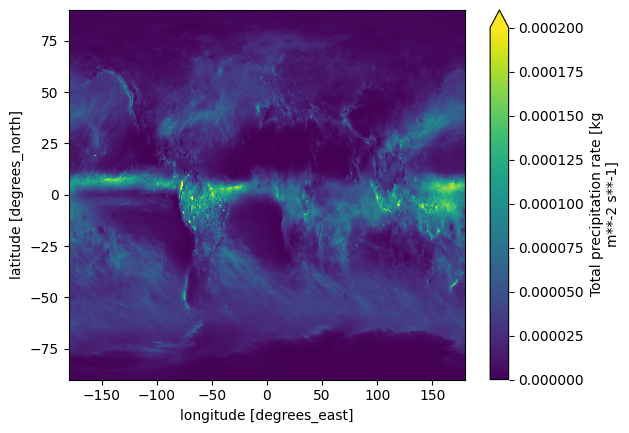

In [8]:
data.tprate.isel(time=[0,1,2,3]).mean("time").plot(vmin=0, vmax=2*1e-4)

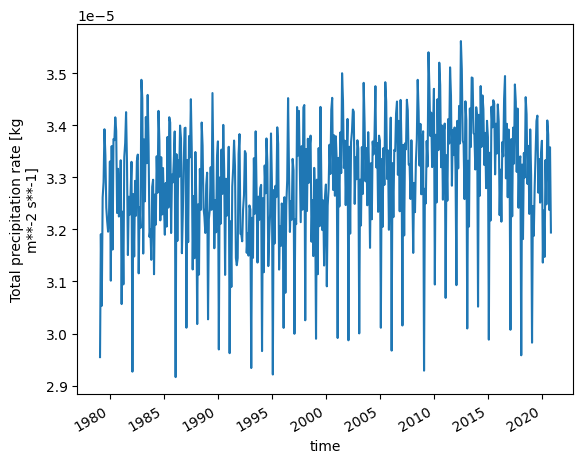

In [9]:
reader.fldmean(data.tprate).plot()

### ERA5 data

On Levante, two ERA5 catalogs are available. A compact one, introduced by AQUA team, including monthly data from a few selected variables, which can be accessed via the `exp=era5` exp key. Together with this, it is possible to access also to the DKRZ GRIB based original catalog of ERA5 (`exp=era5-dkrz`). However, we noticed some difficulties in accessing this data for times to times, so be aware that some interruption might occurr.

Pleaase note that due to a bug into the area routines, for the moment you have to retrieve those data with `fix=False`

In [10]:
from aqua import Reader
reader = Reader(model="ERA5", exp="era5", source="monthly", fix=False)
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:  (time: 996, lon: 1440, lat: 721, plev: 8)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * plev     (plev) float64 1e+03 5e+03 1e+04 2.5e+04 5e+04 7e+04 8.5e+04 1e+05
Data variables: (12/16)
    E        (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    MSL      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    Q        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
    SLHF     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    SSHF     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    SSR      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ...       ...
    TCC      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TP       (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TSR      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TTR      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    U        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
    V        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

We can then plot easily the global averaged temperature evolition of ERA5 using the`fldmean()` method

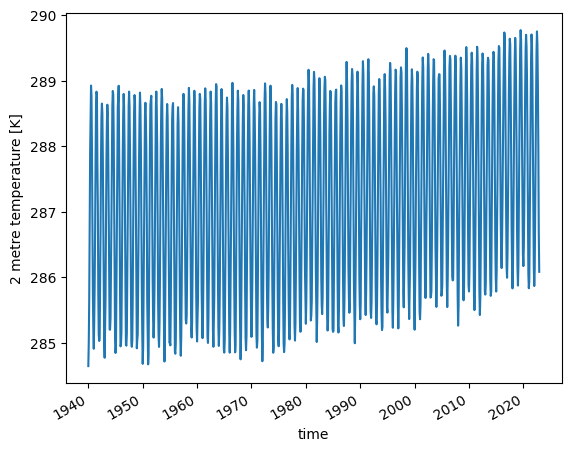

In [11]:
reader.fldmean(data['T2M']).plot()

### AVISO SSH data

In [12]:
from aqua import Reader
reader = Reader(model="AVISO", exp="ssh-L4", source="daily")
data = reader.retrieve()
data

2023-11-30 14:32:54 :: Reader :: WARNING  -> No fixes available for model AVISO
2023-11-30 14:32:55 :: Reader :: ERROR    -> Variable crs has no units!
2023-11-30 14:32:55 :: Reader :: ERROR    -> Variable flag_ice has no units!


<xarray.Dataset>
Dimensions:         (time: 10766, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
  * time            (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2022-06-23
Data variables: (12/14)
    adt             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    crs             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_ugosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_vgosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    sla             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    tpa_correction  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

We can then plot some of the dataset variables as

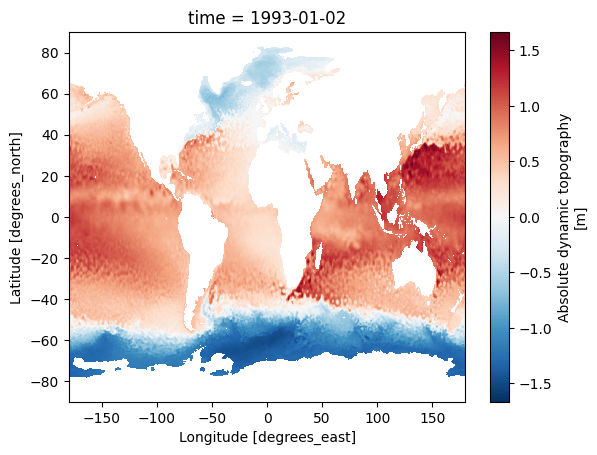

In [13]:
data['adt'][1,:,:].plot()

### CERES radiation data

Similarly, radiation data is available accessing CERES data, both energy balanced ("EBAF") and not ("SYN"). However, correction has been applied to SYN so that they can be considerebe reliable for model evaluation

In [14]:
from aqua import Reader
reader = Reader(model="CERES", exp="ebaf-toa42", source="monthly")
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:                      (time: 275, lon: 360, lat: 180)
Coordinates:
  * time                         (time) datetime64[ns] 2000-03-15 ... 2023-01-15
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/13)
    toa_sw_all_mon               (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_lw_all_mon               (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_net_all_mon              (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_sw_clr_c_mon             (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_lw_clr_c_mon             (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    toa_net_clr_c_mon            (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    ...                           ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldpress_total_daynight_mon  (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldtemp_total_daynight_mon   (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    cldtau_total_day_mon         (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    mtntrf                       (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
    mtnsrf                       (time, lat, lon) float32 dask.array<chunksize=(275, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.2; Release Date December 9, 2022
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF-TOA_L3B004.2
    Fill_Value:   Fill Value is -999.0
    history:      Tue May 02 12:30:56 2023: cdo -selname,cldarea_total_daynig...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

The 2d plot of the June TOA net radiation can be easily produced like this

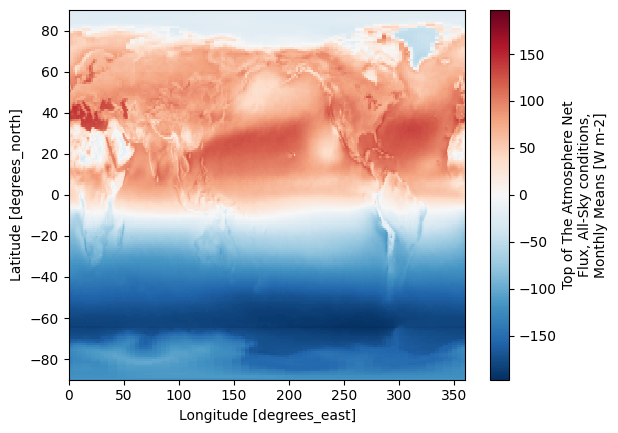

In [15]:
data['toa_net_all_mon'].sel(time=data.time.dt.month==6).mean(dim='time').plot()

Similarly, we can access to the SYN daily data

In [16]:

reader = Reader(model="CERES", exp="syn-toa41", source="daily")
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:                 (time: 7670, lat: 180, lon: 360)
Coordinates:
  * time                    (time) datetime64[ns] 2001-01-01T12:00:00 ... 202...
  * lat                     (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                     (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
Data variables:
    toa_sw_all_daily        (time, lat, lon) float32 dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_lw_all_daily        (time, lat, lon) float32 dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_net_all_daily       (time, lat, lon) float32 dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_lw_all_daily_eb     (time, lat, lon) float32 dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_sw_all_daily_eb     (time, lat, lon) float32 dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    toa_solar_all_daily_eb  (time, lat, lon) float32 dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    mtntrf                  (time, lat, lon) float32 dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
    mtnsrf                  (time, lat, lon) float32 dask.array<chunksize=(408, 30, 60), meta=np.ndarray>
Attributes:
    title:        CERES SYN1deg Daily data
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:       
    Version:      Edition 4.1: Release Date August 22, 2019
    DOI:          10.5067/Terra+Aqua/CERES/SYN1degDay_L3.004A
    Fill_Value:   Fill Value is -999.0
    history:      2023-11-30 14:33:01 retrieved by AQUA retriever;\n2023-11-3...

We can easily plot a timeseries of daily data using the reader fldmean options

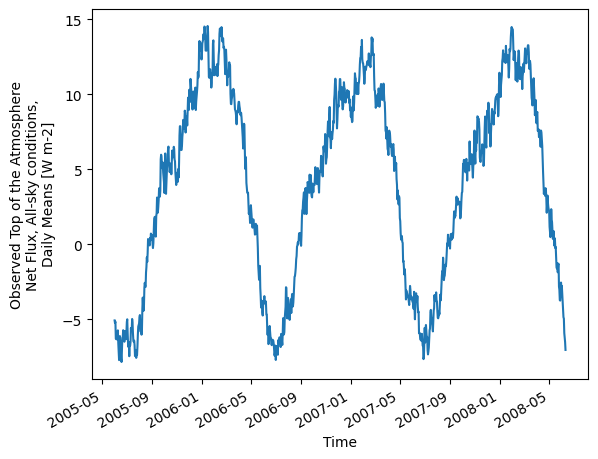

In [17]:
reader.fldmean(data['toa_net_all_daily'].sel(time=slice("2005-06-01", "2008-06-10"))).plot()


# WOA18

Also some oceanic dataset is now available, on multiple levels

In [18]:
from aqua import Reader
reader = Reader(model="WOA18", exp="woa18_2005_2017", source="annual")
woa = reader.retrieve()
woa

2023-11-30 14:33:09 :: Reader :: WARNING  -> No fixes available for model WOA18
2023-11-30 14:33:10 :: Reader :: ERROR    -> Variable crs has no units!
2023-11-30 14:33:10 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2023-11-30 14:33:10 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2023-11-30 14:33:10 :: Reader :: ERROR    -> Variable depth_bnds has no units!
2023-11-30 14:33:10 :: Reader :: ERROR    -> Variable climatology_bounds has no units!


<xarray.Dataset>
Dimensions:             (lat: 720, nbounds: 2, lon: 1440, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 726.0
Dimensions without coordinates: nbounds
Data variables: (12/19)
    crs                 int32 -2147483647
    lat_bnds            (lat, nbounds) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    lon_bnds            (lon, nbounds) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
    depth_bnds          (depth, nbounds) float32 dask.array<chunksize=(102, 2), meta=np.ndarray>
    climatology_bounds  (time, nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    s_an                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    ...                  ...
    t_mn                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_dd                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_sd                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_se                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_oa                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
    t_gp                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29 
    history:                         2023-11-30 14:33:10 retrieved by AQUA re...

The interpolation on multiple levels is supported

In [19]:
from aqua import Reader
reader = Reader(model="WOA18", exp="woa18_2005_2017", source="annual", regrid='r100')
woa = reader.retrieve(var='t_an')
woa

2023-11-30 14:33:10 :: Reader :: WARNING  -> No fixes available for model WOA18


<xarray.Dataset>
Dimensions:  (time: 1, depth: 102, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time     (time) float32 726.0
Data variables:
    t_an     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 180, 360), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29 
    history:                         2023-11-30 14:33:11 retrieved by AQUA re...

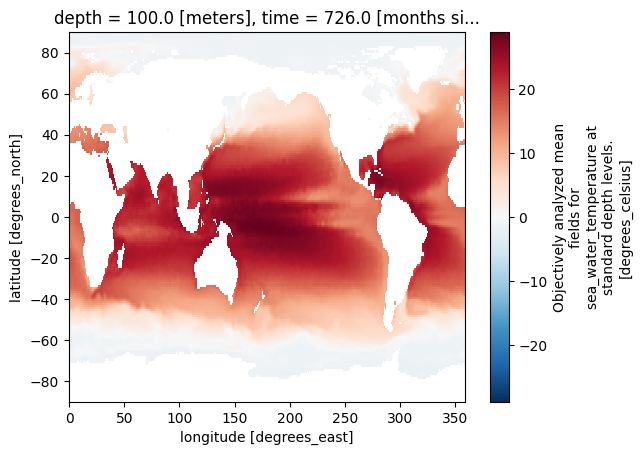

In [20]:
out = reader.regrid(woa.t_an).isel(depth=20)
out.plot()